<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)

((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

In [3]:
import pandas as pd

In [4]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [5]:
import sqlite3 

In [6]:
connect = sqlite3.connect('./db.sqlite3')
dfr.to_sql('boston_housing_resource',connect, if_exists='append', index = False)

In [7]:
df = pd.read_sql_query('select * from boston_housing_resource', connect)

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,1.872555,5.740099,5.552215,0.030941,0.278678,3.133541,34.505322,1.870135,4.720297,202.949257,9.237995,177.391584,6.370408
std,6.830381,17.764915,7.384722,0.728450,0.765015,3.253222,39.780019,2.461847,7.784169,234.655140,9.400253,189.552723,8.210640
min,-0.405101,-0.483615,-1.564696,-0.256833,-1.471269,-3.817250,-2.369042,-1.287503,-0.971569,-1.311311,-2.673752,-3.771101,-1.519664
25%,-0.376625,-0.483615,-0.207917,-0.256833,-0.165227,-0.094274,0.343630,-0.292435,-0.511142,-0.456756,0.283943,0.387489,-0.181948
50%,0.069620,0.000000,1.585443,0.000000,0.483526,3.514093,2.005244,1.577232,1.675886,94.918048,7.101765,0.448077,2.938429
75%,0.630799,0.100884,9.690000,0.000000,0.631000,6.196750,78.400000,3.215700,5.000000,330.000000,19.100000,391.240000,11.367500
max,88.976200,100.000000,27.740000,3.893584,2.677335,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [ ]:
df = pd.DataFrame(x_train)
df.describe()

In [21]:
df.to_sql('boston_housing_scale_x_train', connect, if_exists='append', index=False)

In [22]:
dfr = pd.read_sql_query('select * from boston_housing_scale_x_train',connect)

In [23]:
dfr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


# Model and fit

In [39]:
model = tf.keras.models.Sequential()

In [40]:
model.add(tf.keras.Input(shape=(13))) # input layer

# tf.keras.activations.relu()
model.add(tf.keras.layers.Dense(128, activation='relu')) # 기능 layer  # 정식명칭은 hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # 기능 layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # 기능 layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # 기능 layer
model.add(tf.keras.layers.Dense(32, activation='relu')) # 기능 layer


model.add(tf.keras.layers.Dense(1,)) # output layer

#model.compile(optimizer='sgd',loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()  # 눈에 익혀놓는게 좋음

In [ ]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

# evaluation

In [43]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

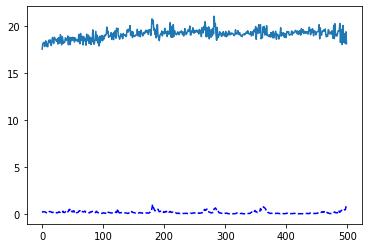

In [46]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [35]:
model.evaluate(x_train, y_train) # activation=sigmoid # 2번째 relu

13/13 [==============================] - 0s 2ms/step - loss: 0.1984 - mae: 0.3118


[0.1984478086233139, 0.3118201792240143]

# Service

In [36]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [37]:
model.predict([[ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[12.859551]], dtype=float32)

In [38]:
y_train[10]

12.1